In [1]:
from typing import Iterable, Any
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cobra
from cobra.io import read_sbml_model
from matplotlib import cm
from matplotlib.colors import ListedColormap
from tqdm import tqdm
from importlib_resources import read_text
from optslope import filter_redundant_knockouts
import json
from cobra.flux_analysis import phenotype_phase_plane, pfba
from path import Path
import os

sys.path.append("..")
from rubisco_bsubtilis import *

max_ko = DEFAULT_MAX_N_KO

In [2]:
FULL_RESULT_PATH = str(Path(WILDTYPE_MODEL_FNAME).parent / f"results_full_{max_ko}KOs.csv")
with open(FULL_RESULT_PATH, "r") as fp:
    result_df = pd.read_csv(fp, index_col=0)
result_df["knockouts"] = result_df.knockouts.apply(eval)
pivot_df = filter_redundant_knockouts(result_df)
pivot_df.head(60)

carbon_sources         2ga     6pg      ac  dhap      for  fru  glc  r5p  \
knockouts                                                                  
(Epdh,)                0.0   0.000  32.081   0.0   41.689  0.0  0.0  0.0   
(TptsG, Epdh)          0.0   0.000  32.081   0.0   41.689  0.0 -1.0  0.0   
(Epdh, Ezwf, Egnd)     0.0  41.689  32.081   0.0   41.689  0.0  0.0  0.0   
(Epck, EmalS, EytsJ)   0.0   0.000   0.000   0.0   41.689  0.0  0.0  0.0   
()                     0.0   0.000   0.000   0.0   41.689  0.0  0.0  0.0   
(EcitG,)               0.0   0.000   0.000   0.0   41.689  0.0  0.0  0.0   
(Esdh,)                0.0   0.000   0.000   0.0   41.689  0.0  0.0  0.0   
(TptsG,)               0.0   0.000   0.000   0.0   41.689  0.0 -1.0  0.0   
(EackA, EacsA)         0.0   0.000  -1.000   0.0   41.689  0.0  0.0  0.0   
(Egnd, Eodh)           0.0   0.000  -1.000   0.0   41.689  0.0  0.0  0.0   
(Egnd, Esdh)           0.0   0.000  -1.000   0.0   41.689  0.0  0.0  0.0   
(Egnd, Esuc)           0.0   0.000  -1.000   0.0   41.689  0.0  0.0  0.0   
(Epdh, EcitG)          0.0   0.000  -1.000   0.0   41.689  0.0  0.0  0.0   
(Epdh, Eodh)           0.0   0.000  -1.000   0.0   41.689  0.0  0.0  0.0   
(Epdh, Esdh)           0.0   0.000  -1.000   0.0   41.689  0.0  0.0  0.0   
(Epdh, Esuc)           0.0   0.000  -1.000   0.0   41.689  0.0  0.0  0.0   
(Epta, EacsA)          0.0   0.000  -1.000   0.0   41.689  0.0  0.0  0.0   
(Ezwf, Egnd)           0.0  41.689   0.000   0.0   41.689  0.0  0.0  0.0   
(Ezwf, Eodh)           0.0   0.000  -1.000   0.0   41.689  0.0  0.0  0.0   
(Ezwf, Esdh)           0.0   0.000  -1.000   0.0   41.689  0.0  0.0  0.0   
(Ezwf, Esuc)           0.0   0.000  -1.000   0.0   41.689  0.0  0.0  0.0   
(TptsG, EcitG)         0.0   0.000   0.000   0.0   41.689  0.0 -1.0  0.0   
(TptsG, Esdh)          0.0   0.000   0.000   0.0   41.689  0.0 -1.0  0.0   
(EackA, EacsA, EcitG)  0.0   0.000  -1.000   0.0   41.689  0.0  0.0  0.0   
(EackA, EacsA, Esdh)   0.0   0.000  -1.000   0.0   41.689  0.0  0.0  0.0   
(EackA, Egnd, EcitG)   0.0   0.000  -1.000   0.0   41.689  0.0  0.0  0.0   
(EackA, Ezwf, EcitG)   0.0   0.000  -1.000   0.0   41.689  0.0  0.0  0.0   
(Egnd, Eodh, EcitG)    0.0   0.000  -1.000   0.0   41.689  0.0  0.0  0.0   
(Egnd, Esuc, EcitG)    0.0   0.000  -1.000   0.0   41.689  0.0  0.0  0.0   
(Epta, EacsA, EcitG)   0.0   0.000  -1.000   0.0   41.689  0.0  0.0  0.0   
(Epta, EacsA, Esdh)    0.0   0.000  -1.000   0.0   41.689  0.0  0.0  0.0   
(Epta, Egnd, EcitG)    0.0   0.000  -1.000   0.0   41.689  0.0  0.0  0.0   
(Epta, Ezwf, EcitG)    0.0   0.000  -1.000   0.0   41.689  0.0  0.0  0.0   
(Ezwf, Egnd, EcitG)    0.0  41.689   0.000   0.0   41.689  0.0  0.0  0.0   
(Ezwf, Egnd, Eodh)     0.0  41.689  -1.000   0.0   41.689  0.0  0.0  0.0   
(Ezwf, Egnd, Esdh)     0.0  41.689  -1.000   0.0   41.689  0.0  0.0  0.0   
(Ezwf, Egnd, Esuc)     0.0  41.689  -1.000   0.0   41.689  0.0  0.0  0.0   
(Ezwf, Eodh, EcitG)    0.0   0.000  -1.000   0.0   41.689  0.0  0.0  0.0   
(Ezwf, Esuc, EcitG)    0.0   0.000  -1.000   0.0   41.689  0.0  0.0  0.0   
(TptsG, EackA, EacsA)  0.0   0.000  -1.000   0.0   41.689  0.0 -1.0  0.0   
(TptsG, Egnd, Eodh)    0.0   0.000  -1.000   0.0   41.689  0.0 -1.0  0.0   
(TptsG, Egnd, Esdh)    0.0   0.000  -1.000   0.0   41.689  0.0 -1.0  0.0   
(TptsG, Egnd, Esuc)    0.0   0.000  -1.000   0.0   41.689  0.0 -1.0  0.0   
(TptsG, Epdh, EcitG)   0.0   0.000  -1.000   0.0   41.689  0.0 -1.0  0.0   
(TptsG, Epdh, Eodh)    0.0   0.000  -1.000   0.0   41.689  0.0 -1.0  0.0   
(TptsG, Epdh, Esdh)    0.0   0.000  -1.000   0.0   41.689  0.0 -1.0  0.0   
(TptsG, Epdh, Esuc)    0.0   0.000  -1.000   0.0   41.689  0.0 -1.0  0.0   
(TptsG, Epta, EacsA)   0.0   0.000  -1.000   0.0   41.689  0.0 -1.0  0.0   
(TptsG, Ezwf, Egnd)    0.0  41.689   0.000   0.0   41.689  0.0 -1.0  0.0   
(TptsG, Ezwf, Eodh)    0.0   0.000  -1.000   0.0   41.689  0.0 -1.0  0.0   
(TptsG, Ezwf, Esdh)    0.0   0.000  -1.000   0.0

In [3]:
# modified version of plotting.plot_production_envelope
# let's us put multiple planes on the same plot. 
def production_envelope(
        knockouts: Iterable[str],
        carbon_sources: Iterable[str],
        target_reaction: str,
        points: int = 40
) -> pd.DataFrame:
    """Calculates the data of the production envelope for a KO.

    :param wt_model: the Wild-Type model without any knockouts
    :param knockouts: the list of KOs
    :param carbon_sources: the list of carbon sources
    :param target_reaction: the reaction to place on the x-axis of the PPP
    :return: A DataFrame with the biomass yield ranges for each x-value
    """
    ko_model = WILDTYPE_MODEL.copy()
    for ko in knockouts:
        for k in ko.split('|'):
            ko_model.reactions.get_by_id(k).knock_out()
    for cs in carbon_sources:
        ko_model.reactions.get_by_id("EX_" + cs + "_e").lower_bound = -10.0 / len(carbon_sources)
    return phenotype_phase_plane.production_envelope(
        ko_model, target_reaction, points=points)


def plot_envelope(
        knockouts: Iterable[str],
        carbon_sources: Iterable[str],
        target_reaction: str,
        ax: plt.Axes,
        label: str = None,
        color: Any = 'b'):
    prod_env_df = production_envelope(
        knockouts=knockouts,
        carbon_sources=carbon_sources,
        target_reaction=target_reaction,
        points=200)

    label = label or ','.join(carbon_sources)
    ax.plot(prod_env_df.flux_minimum,
            prod_env_df[target_reaction],
            c=color, ls='-', lw=2, label=label, alpha=1, zorder=2)
    ax.plot(prod_env_df.flux_maximum,
            prod_env_df[target_reaction],
            c=color, ls='-', lw=2, label='', alpha=1, zorder=2)

    ax.fill_betweenx(
        prod_env_df[target_reaction],
        prod_env_df.flux_minimum,
        prod_env_df.flux_maximum,
        linewidth=0,
        alpha=0.2,
        facecolor=color,
        label='',
        zorder=1)

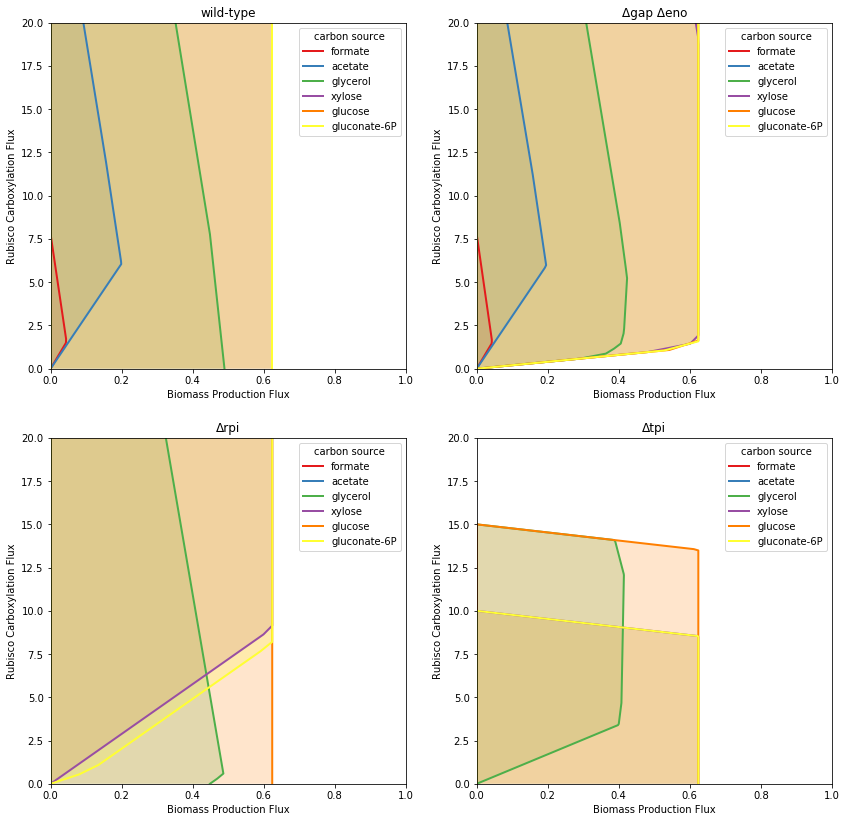

In [4]:
# Colors for plotting
colors = sns.color_palette(palette="Set1", n_colors=12)

# gapA KO was previously published by Mueller-Cajar '07 and others.
# Plot shows that this strain has slope 0 on sample carbon sources.
fig = plt.figure(figsize=(14, 14))

csources_list = [
    (["for"], 'formate'),
    (["ac"], 'acetate'),
    (['dhap'], 'glycerol'),
    (['xu5p__D'], 'xylose'),
    (["glc__D"], 'glucose'),
    (["6pgc"], 'gluconate-6P'),
]

mutant_list = [
    ([], "wild-type"),
    (["GAPD", "ENO"], "Δgap Δeno"), # GAPD can be replaced by PGK, and ENO by PGM
    (["RPI"], "Δrpi"),
    (["TPI"], "Δtpi"),
]

for j, (knockouts, mutant_name) in enumerate(mutant_list):
    ax = fig.add_subplot(2, 2, j+1)
    for (csources, csource_name), color in zip(csources_list, colors):
        plot_envelope(
            knockouts=knockouts,
            carbon_sources=csources,
            target_reaction="RBC",
            ax=ax,
            label=csource_name,
            color=color)
    
    ax.set_title(mutant_name)
    ax.set_xlabel('Biomass Production Flux')
    ax.set_ylabel('Rubisco Carboxylation Flux')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 20)
    ax.legend(loc="upper right", title="carbon source")

display(fig)
fig.savefig("ppp_highlights.png", dpi=300)
plt.close(fig)

In [24]:
# verify that the glyoxylate shunt is not present in B. subtilis

from cobra.io import read_sbml_model
wt_model = read_sbml_model("iYO844.xml")

wt_model.reactions.EX_glc__D_e.bounds = (0, 999999)
wt_model.reactions.ATPM.bounds = (0, 0)
wt_model.reactions.EX_ac_e.bounds = (-10, 999999)

sol = wt_model.optimize()
wt_model.summary()